<font size=8> Network Tests


In [1]:
#Common Python Packages
from pickle import TRUE
import time
import sys
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

#dynapse2 spikegen imports
from lib.dynapse2_util import *
from lib.dynapse2_network import Network
from lib.dynapse2_spikegen import send_events,get_fpga_time, send_virtual_events, poisson_gen, isi_gen,regular_gen
from lib.dynapse2_raster import *
from lib.dynapse2_obj import *

#Statistics imports
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy.signal import butter, filtfilt
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from itertools import product
#my imports
from adaptation import pc_single,ff,pc_pv_sst,ff_network
from adaptation_lib.spike_stats import *
from adaptation_lib.dynapse_setup import *
from adaptation_lib.graphing import *
from configs import neuron_configs_bio




In [2]:
[board,profile_path,number_of_chips]=obtain_board()

<font size=7> Manual Tuning


Setting Latches
Setting up network
Adding connections

Setting monitors
20 100 15

PC Neurons

[221, 235, 201, 211, 230, 237, 234, 236, 250, 169, 180, 183, 189, 204, 227, 242, 188, 194, 248, 251, 203, 215, 219, 228, 196, 165, 171, 181, 195, 220, 222, 244, 149, 156, 164, 179, 205, 206, 217, 226, 238, 254, 148, 157, 158, 210, 214, 232, 245, 246, 131, 152, 161, 163, 167, 173, 176, 198, 200, 209, 231, 233, 113, 146, 170, 190, 192, 197, 229, 247, 249, 115, 118, 139, 141, 143, 159, 160, 166, 186, 202, 213, 218, 107, 134, 151, 155, 162, 177, 191, 216, 225, 243, 116, 126, 130, 140, 145, 168, 175]

PV Neurons

[255, 252, 202, 233, 239, 223, 206, 238, 251, 173, 207, 253, 254, 186, 199, 221, 235, 237, 191, 213]

PV Neurons

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

All configurations done!

Input events created
initilize run dynapse
initilize run dynapse

getting fpga time


setting virtual neurons

Simulation done
PC_CV_average: 0.07 PV_CV_average: 0.4 SST_CV_average: 0.0
PC_synchrony:

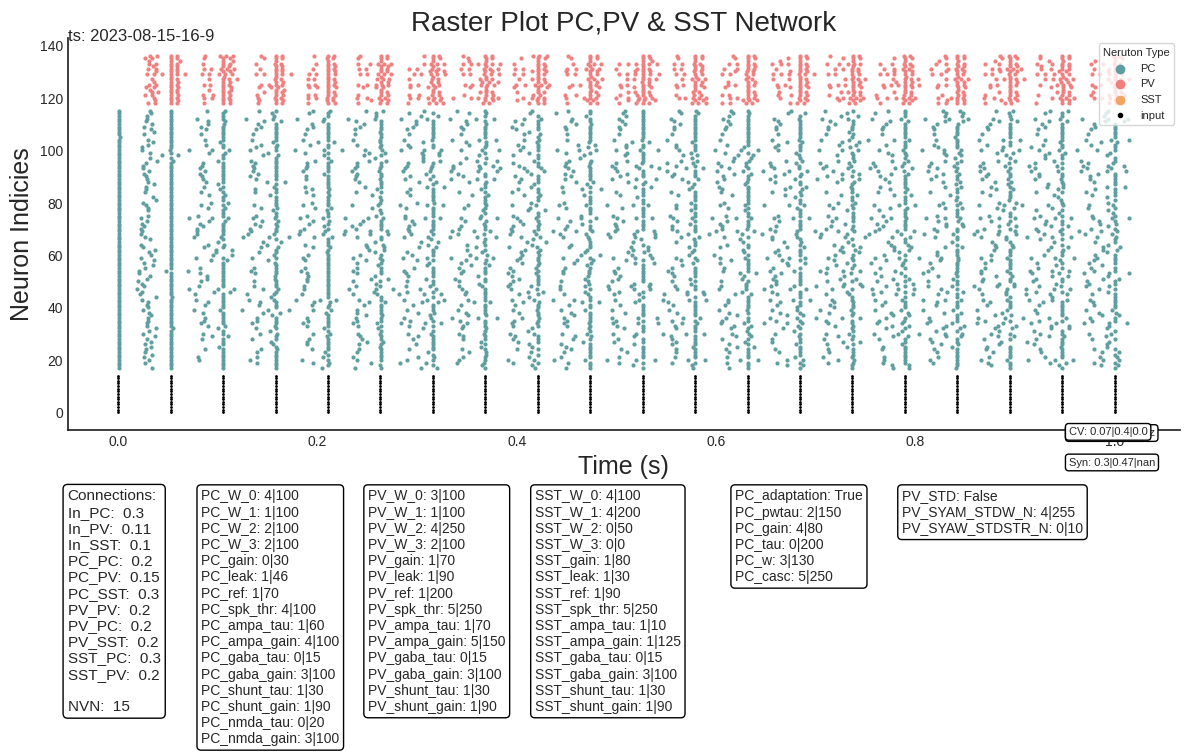

In [11]:
neuron_config=neuron_configs_bio.config()

neuron_config['PC_W0']=[4,100]# PC input
neuron_config['PC_W1']=[1,100]#recurrent PC to PC
neuron_config['PC_W2']=[2,100]#PV shunt inhibition to PC
neuron_config['PC_W3']=[2,100]#SST gaba inhibition to PC

neuron_config['PV_W1']=[1,100]#PC_to PV
neuron_config['PV_W2']=[4,250]#PV gaba inhibition to PV
neuron_config['PV_W3']=[2,100]#SST gaba inhibition to PV

neuron_config['SST_W0']=[4,100]#input weight to PC
neuron_config['SST_W1']=[4,200]#PC to SST weight
neuron_config['SST_W2']=[0,50]#PV shunt inhibition to SST

neuron_config['nvn']=15
neuron_config['pcn']=100
neuron_config['pvn']=20
neuron_config['sstn']=15

neuron_config['SST_AMPA_GAIN']=[1,125]
neuron_config['SST_AMPA_TAU']=[1,10]
neuron_config['SST_LEAK']=[1,30]

neuron_config['Input_PC']=.3
neuron_config['Input_PV']=.11#.2
neuron_config['Input_SST']=.1#.1#.1

neuron_config['PC_PC']=.2
neuron_config['PC_PV']=.15#.1
neuron_config['PC_SST']=.3#.1

neuron_config['PV_PV']=.2#.2
neuron_config['PV_PC']=.2#0
neuron_config['PV_SST']=.2#.2

neuron_config['SST_PC']=.3#.1
neuron_config['SST_PV']=.2#.2

neuron_config['PC_Adaptation']=True
neuron_config['duration']=1
neuron_config['input_type']='Regular'
neuron_config['in_freq']=20

[output_events,test_config]=pc_pv_sst.pc_pv_sst(board=board, profile_path=profile_path, number_of_chips=number_of_chips,neuron_config=neuron_config)
[cv_values,synchrony_values]=run_dynamic_anal(output_events,test_config)
if 'raster_fig' in locals() and raster_fig is not None:
    raster_fig.savefig('raster_previous.png')
if 'fvt_fig' in locals() and fvt_fig is not None:
    fvt_fig.savefig('fvt_previous.png')
raster_fig=script_annotated_raster_plot(test_config,output_events,neuron_config,cv_values=cv_values,syn_values=synchrony_values,save=True,annotate=False,annotate_network=True)
fvt_fig=frequency_vs_time_plot(frequency_over_time(test_config,output_events),test_config,save=True,annotate=False,show=True)
raster_fig.savefig('raster_current.png')
fvt_fig.savefig('fvt_current.png')



In [10]:
[time_axis,ff_windows_pc,ff_windows_pv,ff_windows_sst]=frequency_over_time(test_config,output_events)
print(ff_windows_sst)
print(time_axis)

[33.33333333 55.         53.33333333 40.         33.33333333 55.
 50.         50.         36.66666667 30.         55.         48.33333333
 48.33333333 38.33333333 30.         55.         48.33333333 48.33333333
 38.33333333 30.         55.         48.33333333 41.66666667 45.
 30.         51.66666667 50.         38.33333333 48.33333333 30.
 53.33333333 50.         35.         51.66666667 30.         53.33333333
 50.         35.         51.66666667 30.         53.33333333 50.
 35.         51.66666667 30.         51.66666667 53.33333333 31.66666667
 55.         30.         51.66666667 50.         31.66666667 55.
 30.         51.66666667 51.66666667 31.66666667 53.33333333 31.66666667
 51.66666667 53.33333333 31.66666667 51.66666667 33.33333333 51.66666667
 50.         33.33333333 35.         50.         51.66666667 50.
 33.33333333 30.         55.         51.66666667 48.33333333 35.
 30.         55.         51.66666667 48.33333333 36.66666667 30.
 55.         48.33333333 48.33333333 38.33

In [17]:


slope = calculate_slope(time_axis, ff_windows_sst)
print(slope)

-0.022814487725385055


In [ ]:
import random
import timeout_decorator
neuron_config=neuron_configs_bio.config()

def randomize_config(neuron_config):
    neuron_config['SST_W0'] = [random.randint(1, 3), random.randint(10, 250)]
    neuron_config['SST_AMPA_GAIN'] = [random.randint(1, 3), random.randint(10, 250)]
    neuron_config['SST_AMPA_TAU'] = [random.randint(0, 1), random.randint(10, 250)]
    neuron_config['SST_LEAK']= [0, random.randint(20, 250)]

    neuron_config['Input_SST'] = random.uniform(.05, .5)

    neuron_config['PC_SST'] = random.uniform(.05, .5)

    neuron_config['PC_Adaptation'] = True
    neuron_config['duration'] = 15
    neuron_config['input_type'] = 'Regular'
    neuron_config['in_freq'] = 20

    return neuron_config


@timeout_decorator.timeout(40)  # Set a 5-second timeout
def run_simulation(neuron_config):
    return pc_pv_sst.pc_pv_sst(
        board=board,
        profile_path=profile_path,
        number_of_chips=number_of_chips,
        neuron_config=neuron_config
    )

successful_simulations = 0

for i in range(1000):  # Example: Keep trying different configurations until 100 successful simulations
    neuron_config = randomize_config(neuron_config)  # Assuming you've updated randomize_config without an argument
    try:
        [output_events, test_config] = run_simulation(neuron_config)
        [cv_values, synchrony_values] = run_dynamic_anal(output_events, test_config)
        raster_fig = script_annotated_raster_plot(test_config, output_events, neuron_config, cv_values=cv_values, syn_values=synchrony_values, save=True, annotate=False, annotate_network=True)
        fvt_fig = frequency_vs_time_plot(frequency_over_time(test_config, output_events), test_config, save=True, annotate=False, show=True)
        raster_fig.savefig(f'raster_current.png')
        fvt_fig.savefig(f'fvt_curernt.png')
        print(f"Simulation {successful_simulations + 1} completed successfully!")
        successful_simulations += 1
        
        if successful_simulations >= 2000: # Stop after 100 successful simulations
            break

    except timeout_decorator.TimeoutError:
        print("Simulation timed out, trying again with new parameters...")

print("Completed 100 successful simulations.")


In [ ]:

def calculate_slope(time_axis, ff_windows_sst):
    slope, intercept, r_value, p_value, std_err = linregress(time_axis, ff_windows_sst)
    return slope

param_grid = {
    'sst_w0': product([2,5],[10,100,150,250]),
    'sst_ampa_gain': product([1, 3], [10,100,150, 250]),
    'sst_ampa_tau': product([0, 1], [10,100,150, 250]),
    'sst_leak': product([0], [20, 250]),
    'input_sst': [.05, .1,.2,.3],
    'pc_sst': [.05, .1,.2,.3]
}

# Load previous results if available
try:
    with open('results.pkl', 'rb') as f:
        results = pickle.load(f)
except FileNotFoundError:
    results = []

total_combinations = len(list(product(*param_grid.values()))) # Total number of parameter combinations

# Iterate through the parameter grid
for i, (sst_w0, sst_ampa_gain, sst_ampa_tau, sst_leak, input_sst, pc_sst) in enumerate(product(*param_grid.values()), start=len(results)):
    print(f"Running simulation {i+1}/{total_combinations}...")
    
    neuron_config = {
        'SST_W0': sst_w0,
        'SST_AMPA_GAIN': sst_ampa_gain,
        'SST_AMPA_TAU': sst_ampa_tau,
        'SST_LEAK': sst_leak,
        'Input_SST': input_sst,
        'PC_SST': pc_sst,
        'PC_Adaptation': True,
        'duration': 15,
        'input_type': 'Regular',
        'in_freq': 20
    }


    try:
        [output_events, _] = run_simulation(neuron_config)
        [time_axis, ff_windows_pc, ff_windows_pv, ff_windows_sst] = frequency_over_time(test_config, output_events)
        slope = calculate_slope(time_axis, ff_windows_sst)
        results.append((neuron_config, slope))
        
        # Save progress
        with open('results.pkl', 'wb') as f:
            pickle.dump(results, f)

    except timeout_decorator.TimeoutError:
        print("Simulation timed out, trying again with new parameters...")

print("Simulation completed.")

